In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from  scipy.stats import skew, kurtosis, shapiro

# Import the data
* The data contains Na values in every row of the csv file

In [3]:
consumptionLoad = pd.read_csv("D:\Onedrive\Leuven\Final project\data\consumption.csv",index_col = "meter_id")
new_index = np.arange(1,len(consumptionLoad.index)+1)
new_index = []
for i in np.arange(1,len(consumptionLoad.index)+1):
    new_index.append("meter_" + str(i))
new_index = pd.Series(new_index)
consumptionLoad.set_index(new_index,inplace=True)
consumptionLoad_T = consumptionLoad.transpose()
dates = pd.to_datetime(consumptionLoad_T.index)
consumptionLoad_T = consumptionLoad_T.set_index(dates);consumptionLoad_T.head()

meter_1  meter_2  meter_3  meter_4  meter_5  meter_6  \
2017-01-01 00:00:00      NaN      NaN      NaN      NaN      NaN      NaN   
2017-01-01 00:30:00      NaN      NaN      NaN      NaN      NaN      NaN   
2017-01-01 01:00:00      NaN      NaN      NaN      NaN      NaN      NaN   
2017-01-01 01:30:00      NaN      NaN      NaN      NaN      NaN      NaN   
2017-01-01 02:00:00      NaN      NaN      NaN      NaN      NaN      NaN   

                     meter_7  meter_8  meter_9  meter_10  ...  meter_3239  \
2017-01-01 00:00:00      NaN      NaN      NaN       NaN  ...       0.219   
2017-01-01 00:30:00      NaN      NaN      NaN       NaN  ...       2.707   
2017-01-01 01:00:00      NaN      NaN      NaN       NaN  ...       2.752   
2017-01-01 01:30:00      NaN      NaN      NaN       NaN  ...       2.369   
2017-01-01 02:00:00      NaN      NaN      NaN       NaN  ...       1.583   

                     meter_3240  meter_3241  meter_3242  meter_3243  \
2017-01-01 00:00:00       0.015       0.320       0.012       0.155   
2017-01-01 00:30:00       2.879       0.325       1.476       0.153   
2017-01-01 01:00:00       2.895       0.194       0.237       0.161   
2017-01-01 01:30:00       2.038       0.284       0.274       0.206   
2017-01-01 02:00:00       1.635       0.278       0.015       0.168   

                     meter_3244  meter_3245  meter_3246  meter_3247  \
2017-01-01 00:00:00       0.011       0.015       0.222       0.195   
2017-01-01 00:30:00       1.089       1.523       0.276       2.881   
2017-01-01 01:00:00       0.014       0.105       0.097       1.765   
2017-01-01 01:30:00       0.204       0.296       0.058       1.391   
2017-01-01 02:00:00       0.015       0.067       0.045       1.609   

                     meter_3248  
2017-01-01 00:00:00       0.023  
2017-01-01 00:30:00       2.307  
2017-01-01 01:00:00       1.403  
2017-01-01 01:30:00       1.471  
2017-01-01 02:00:00       1.421  

[5 rows x 3248 columns]

In [5]:
def figure_layout(figsize,titel,xlabel,ylabel,fontsize_titel,fontsize_axis,fontsize_legend,fontsize_ticks):
    plt.figure(figsize=figsize)
    ax1 = plt.gca()
    plt.rc('legend',fontsize=fontsize_legend)
    plt.title(titel, fontsize=fontsize_titel, fontweight = 'bold')
    plt.grid(True)
    plt.xlabel(xlabel, fontsize=fontsize_axis)
    plt.ylabel(ylabel, fontsize=fontsize_axis)
    for tick in ax1.xaxis.get_major_ticks():
            tick.label1.set_fontsize(fontsize_ticks)
    #         tick.label1.set_fontweight('bold')
    for tick in ax1.yaxis.get_major_ticks():
        tick.label1.set_fontsize(fontsize_ticks)
    #     tick.label1.set_fontweight('bold')
    
    return ax1

* The 270 timeseries with the least amount of NaN are selected. 

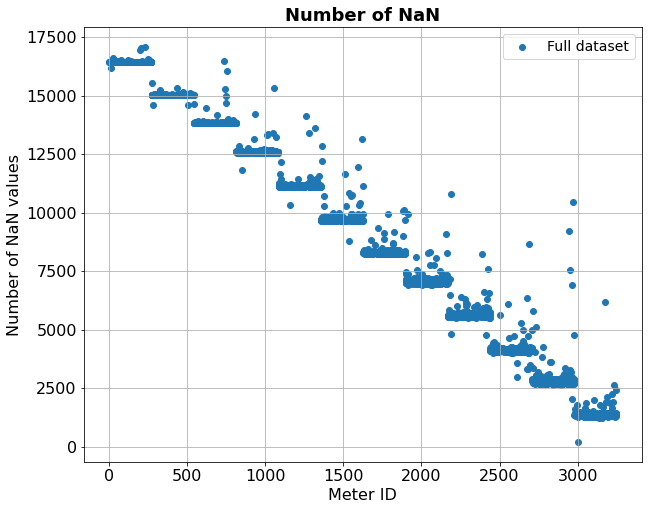

In [28]:
axes = figure_layout((10,8),"Number of NaN","Meter ID","Number of NaN values",18,16,14,16)
axes.scatter(np.arange(1,len(consumptionLoad.index)+1), numberNan)
axes.legend(["Full dataset"])
plt.show()

meter_3002      192
meter_3139     1200
meter_3155     1200
meter_3146     1248
meter_3038     1248
              ...  
meter_250     16560
meter_28      16608
meter_199     16944
meter_204     17040
meter_229     17088
Length: 3248, dtype: int64
meter_2966    2049
meter_2979    1344
meter_2980    1584
meter_2981    1344
meter_2982    1392
              ... 
meter_3244    1392
meter_3245    2400
meter_3246    1344
meter_3247    1296
meter_3248    1392
Length: 269, dtype: int64


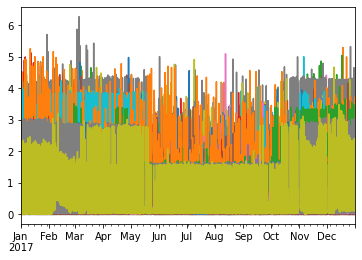

In [76]:
numberNan = consumptionLoad_T.isnull().sum()
numberNan_sorted = numberNan.sort_values(ascending = True)
# most_rich_data = numberNan_sorted.iloc[0:300]
most_rich_data = numberNan[numberNan<2500]
print(most_rich_data)
CL = consumptionLoad_T[most_rich_data.index]
CL.plot(legend = False);plt.show()

In [64]:
januari_check = CL.loc["2017-01-01 00:00:00":"2017-01-31 23:30:00"]
amountNaN_jan = januari_check.isnull().sum()
amountNaN_jan[amountNaN_jan > 100] # meters removed

meter_2966    1488
meter_3159    1248
meter_3178     192
meter_3209     192
meter_3222     240
dtype: int64

Remove the time series with to many NaN in Januari.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17520 entries, 2017-01-01 00:00:00 to 2017-12-31 23:30:00
Columns: 264 entries, meter_2979 to meter_3248
dtypes: float64(264)
memory usage: 36.0 MB


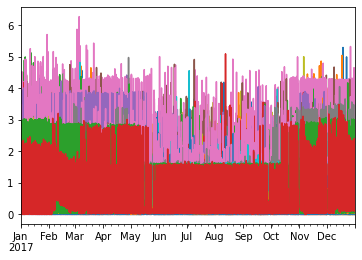

In [62]:
fullYeardata = consumptionLoad_T[amountNaN_jan[amountNaN_jan < 100].index]
fullYeardata.info()
fullYeardata.plot(legend = False);plt.show()

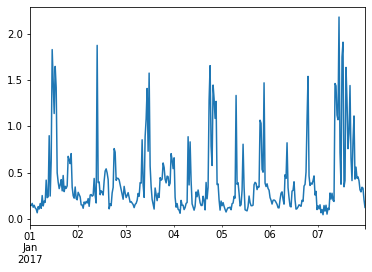

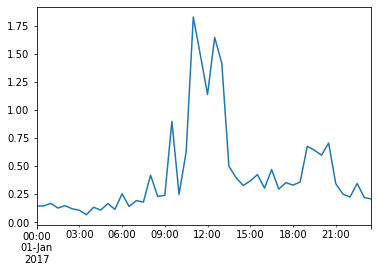

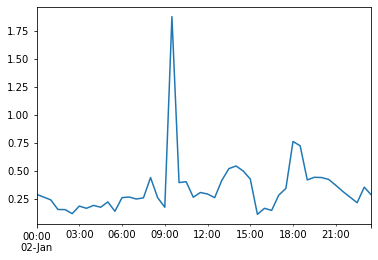

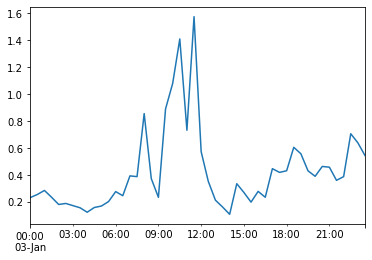

In [79]:
fullYeardata.head()
ser = fullYeardata["meter_3002"]
plt.figure();fullYeardata["meter_3002"].loc["2017-01-01 00:00:00":"2017-01-07 23:30:00"].plot()
plt.figure();fullYeardata["meter_3002"].loc["2017-01-01 00:00:00":"2017-01-01 23:30:00"].plot()
plt.figure();fullYeardata["meter_3002"].loc["2017-01-02 00:00:00":"2017-01-02 23:30:00"].plot()
plt.figure();fullYeardata["meter_3002"].loc["2017-01-03 00:00:00":"2017-01-03 23:30:00"].plot()
plt.show()

* All the time series have missing values --> https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=7858189
## What is the difference between weekdays and weekends? 

In [206]:
# pd.Series(pd.period_range('1/1/2017', freq='W', periods=3))
# fullYeardata_D = fullYeardata.resample('D').agg(['mean'])
fullYeardata.info()
amount_meters = fullYeardata.shape[1]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17520 entries, 2017-01-01 00:00:00 to 2017-12-31 23:30:00
Columns: 264 entries, meter_2979 to meter_3248
dtypes: float64(264)
memory usage: 36.0 MB


In [213]:
start_dates = pd.date_range('1/1/2017 00:00:00', freq='W-SUN', periods=52)

In [214]:
end_dates = pd.date_range('1/7/2017 23:30:00', freq='W-SAT', periods=52)

In [215]:
weeklyData = fullYeardata.loc[start_dates[0]:end_dates[0]]

In [221]:
weeklyData = fullYeardata.loc[start_dates[0]:end_dates[0]]
weeklyData = weeklyData.reset_index(drop=True)
weeklyData = weeklyData.fillna(0) # NaN values are replaced by zero which is an approximation
for i in np.arange(1,len(start_dates),1):
    temp_weeklyData = fullYeardata.loc[start_dates[i]:end_dates[i]]
    temp_weeklyData = temp_weeklyData.reset_index(drop=True) 
    temp_weeklyData = temp_weeklyData.fillna(0)
    weeklyData = weeklyData.add(temp_weeklyData)
weeklyData


meter_2979  meter_2980  meter_2981  meter_2982  meter_2983  meter_2984  \
0         7.788       5.588       7.211       3.546       1.871      21.539   
1         7.397      80.944      76.035       3.092       1.946      27.560   
2         7.827      41.279      61.027       2.550       1.941      24.097   
3         7.013      23.419      39.897       4.160       1.925      49.623   
4         7.033      15.076      25.097      26.501       6.663      41.205   
..          ...         ...         ...         ...         ...         ...   
331      17.021       6.462      11.728       8.475       2.864      25.097   
332      13.379       5.605      11.328       7.585       2.310      26.338   
333      13.236       5.336      10.179       5.376       2.210      22.738   
334      12.628       5.324       9.385       3.759       2.078      25.507   
335       8.760       5.350       8.071       2.859       1.730      24.537   

     meter_2985  meter_2986  meter_2987  meter_2988  ...  meter_3239  \
0         2.050       4.318       3.331      16.019  ...       6.413   
1         2.557       3.583       3.089      17.322  ...     125.465   
2         1.460       3.109       3.087      17.521  ...     117.202   
3         1.259       2.917       3.010      16.818  ...      67.497   
4         1.833       2.900       3.119      16.692  ...      48.793   
..          ...         ...         ...         ...  ...         ...   
331       0.756       6.613       9.451      12.637  ...      10.573   
332       0.747       5.746       7.787      12.366  ...      11.961   
333       0.759       5.188       5.820      13.042  ...       8.346   
334       0.949       4.926       4.372      13.893  ...       6.216   
335       1.881       4.586       3.228      14.949  ...       6.258   

     meter_3240  meter_3241  meter_3242  meter_3243  meter_3244  meter_3245  \
0         1.955      16.192       4.351       8.431       2.401       0.656   
1        88.525      14.632      92.808       7.965      60.979      60.720   
2        82.921      13.460      84.898       7.755      14.561      11.977   
3        45.054      13.604      83.846       7.704       8.020      10.501   
4        21.735      14.261      77.388       7.617       7.831       7.553   
..          ...         ...         ...         ...         ...         ...   
331       4.083      19.901      10.379      14.710       2.322       0.669   
332       5.957      19.564       8.471      13.039       2.264       0.604   
333       3.887      19.884       7.985      11.476       2.259       0.628   
334       2.581      18.330       6.321      11.209       2.337       0.609   
335       1.943      17.276       5.773       8.975       2.352       0.655   

     meter_3246  meter_3247  meter_3248  
0         4.616       3.739       5.694  
1         3.798     113.872     101.018  
2         3.468      52.341      59.012  
3         3.162      39.712      41.498  
4         4.167      42.479      33.584  
..          ...         ...         ...  
331       6.744      11.614       6.832  
332       6.175       9.334       6.119  
333       6.390       6.279       5.627  
334       5.280       3.528       5.583  
335       5.293       3.294       5.261  

[336 rows x 264 columns]

In [256]:
meanLoad = weeklyData.div(len(start_dates)).sum(axis=1).div(amount_meters)
meanLoad = meanLoad.div(meanLoad.max())
print(meanLoad)
monday = meanLoad.iloc[0:48].sum(axis=0)
tuesday = meanLoad.iloc[49:96].sum(axis=0)
wednesday = meanLoad.iloc[97:144].sum(axis=0)
thursday = meanLoad.iloc[145:192].sum(axis=0)
friday = meanLoad.iloc[193:240].sum(axis=0)
saterday = meanLoad.iloc[241:288].sum(axis=0)
sunday = meanLoad.iloc[289:].sum(axis=0)

0      0.383005
1      0.678028
2      0.549427
3      0.502620
4      0.534702
         ...   
331    0.635137
332    0.593190
333    0.521497
334    0.451372
335    0.403446
Length: 336, dtype: float64


30.24763697561896

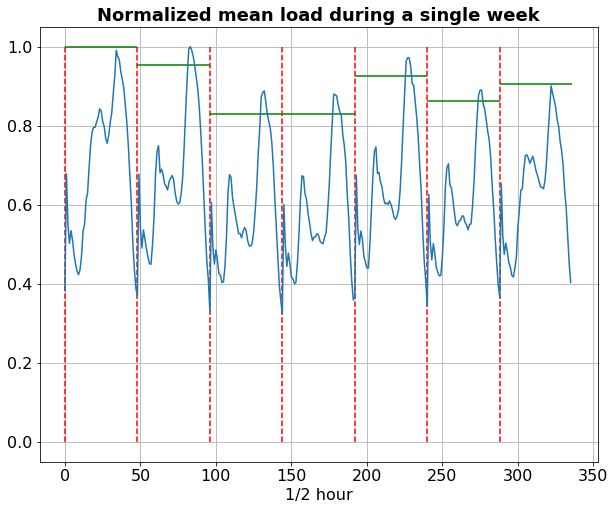

In [262]:
axes1 = figure_layout((10,8),"Normalized mean load during a single week","1/2 hour","",18,16,14,16)
days_hours = [0,48,96,144,192,240,288,336]
for i in [0,48,96,144,192,240,288]:
    plt.vlines(x=i,ymin=0,ymax=1,colors='r',linestyles='dashed')
j=0
maximum = max([monday,tuesday,wednesday,thursday,friday,saterday,sunday])
for i in [monday,tuesday,wednesday,thursday,friday,saterday,sunday]:
    plt.hlines(y=i/maximum,xmin=days_hours[j],xmax=days_hours[j+1],colors='g')
    j += 1
meanLoad.plot(grid=True, ax = axes1)

plt.show()

* I expected a bigger difference between weekdays and weekends